In [ ]:
# Full code will begins here 

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
import lime 
import pickle
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
from skimage.segmentation import mark_boundaries

In [2]:

from optparse import OptionParser

oparser = OptionParser()
oparser.add_option('--data', default='Tox21_p53_Test'  , action='store')
oparser.add_option('--model_name', default= '1548952376_0874684' , action='store')
oparser.add_option('--test', default=False , action='store')
(options, oargs) = oparser.parse_args()

W0708 15:15:16.363959 140702691571456 deprecation.py:506] From /home/shubhamt/miniconda3/envs/lime_image/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0708 15:15:16.364798 140702691571456 deprecation.py:506] From /home/shubhamt/miniconda3/envs/lime_image/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0708 15:15:16.484832 140702691571456 deprecation.py:573] From /home/shubhamt/miniconda3/envs/lime_image/lib/python3.7/site-packages/tensorflow/python/util/de

In [5]:
img_width = 128
img_height = 128
def preprocess_image(image_path):
        image = cv2.imread(image_path)
        image = cv2.resize(image, (img_width, img_height))
        img_to_array = tf.keras.preprocessing.image.img_to_array
        image = img_to_array(image)
        image = np.array(image, dtype="float32") / 255.0
        images = np.expand_dims(image, axis=0)
        return images

In [6]:
data = options.data
model_name = options.model_name
testing = options.test
path = '../images/'+data+'/toxic'
#result_path1 = '../images/Tox21_p53_Test/Toxic_results_two_features'
#result_path2 = '../images/Tox21_p53_Test/Tox_results_one_features'
model = tf.keras.models.load_model('../models/model_'+model_name+'.h5')
model.load_weights('../models/weights_'+model_name+'.h5')


result_dict = {}
start = '_ID_'
end = '.jpeg'
f = os.listdir(path)
if testing ==True:
    f = f[:10]
for j,file in enumerate(f):
        print('current loop: ',j )        
        s = file
        ID_mol = s[s.find(start)+1:s.rfind(end)]
        print("current_ID:  ",ID_mol)
        result_dict[ID_mol] = {}
        image_path = os.path.join(path,file) 
        images = preprocess_image(image_path)
        print(images.shape)
        print("..explainer is working ...")
        explainer = lime_image.LimeImageExplainer(verbose =True)
        explanation = explainer.explain_instance(images[0], model.predict, top_labels=2, hide_color=0, num_samples=1000,segmentation_fn = SegmentationAlgorithm('quickshift', kernel_size=1,
                                                    max_dist=200, ratio=0.2,random_seed=42))
        temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1, hide_rest=False)
        a = mark_boundaries(temp , mask)
        print(a.mean())
        result_dict[ID_mol]["num_features_1"] = {} 
        result_dict[ID_mol]["num_features_1"]["temp"] = temp
        result_dict[ID_mol]["num_features_1"]["mask"] = mask
        result_dict[ID_mol]["num_features_1"]["mb"] = a
        result_dict[ID_mol]["num_features_1"]["explanation"] = explanation
        print("..explaination saved ...")
        #temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1, hide_rest=True)
        #plt.imshow(temp)
        
        temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=2, hide_rest=False)
        a = mark_boundaries(temp , mask)
        #plt.imshow(a)
        result_dict[ID_mol]["num_features_2"] = {} 
        result_dict[ID_mol]["num_features_2"]["temp"] = temp
        result_dict[ID_mol]["num_features_2"]["mask"] = mask
        result_dict[ID_mol]["num_features_2"]["mb"] = a
        result_dict[ID_mol]["num_features_2"]["explanation"] = explanation
        #temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=2, hide_rest=True)
        #regiondetect_twofeature.append(temp)
        #plt.imshow(temp)
        #matplotlib.image.imsave(os.path.join(result_path1+str(file)), a)
        #plt.imshow(mark_boundaries(temp , mask))



current loop:  0
current_ID:   ID_NCGC00261583_angles_6_45
(1, 128, 128, 3)
..explainer is working ...


KeyboardInterrupt: 

In [9]:
if testing = False: 
    f = open('../pickles/results_summary_'+data+model_name+'_pkl','wb')
    pickle.dump(result_dict,f)
    f.close()
    print('file saved as : ' , '../pickles/results_summary_'+data+model_name+'_pkl')
    


file saved as :  ../pickles/results_summary_pkl


In [ ]:

#Box detection
from skimage.color import rgb2gray
img_width = 128
img_height = 128
l1 = img_width//3 
l2= l1 +img_width//3 
l3 = img_width
w1  =img_height//3 
w2= w1+img_height//3
w3 = img_height
box_one_feature = []



for play in regiondetect_onefeature:
    play=rgb2gray(play)
    mini_list = []
    if(play[0:l1,0:w1].sum() > 10):
        mini_list.append(1)
    if(play[0:l1,w1:w2].sum() > 10):
        mini_list.append(2)
    if(play[0:l1,w2:w3].sum() > 10):
        mini_list.append(3)
    if(play[l1:l2,0:w1].sum() > 10):
        mini_list.append(4)    
    if(play[l1:l2,w1:w2].sum() > 10):
        mini_list.append(5)
    if(play[l1:l2,w2:w3].sum() > 10):
        mini_list.append(6)
    if(play[l2:l3,0:w1].sum() > 10):
        mini_list.append(7)
    if(play[l2:l3,w1:w2].sum() > 10):
        mini_list.append(8)
    if(play[l2:l3,w2:w3].sum() > 10):
        mini_list.append(9)
    box_one_feature.append(mini_list)

In [ ]:
box_two_feature = []



for play in regiondetect_twofeature:
    play=rgb2gray(play)
    mini_list = []
    if(play[0:l1,0:w1].sum() > 10):
        mini_list.append(1)
    if(play[0:l1,w1:w2].sum() > 10):
        mini_list.append(2)
    if(play[0:l1,w2:w3].sum() > 10):
        mini_list.append(3)
    if(play[l1:l2,0:w1].sum() > 10):
        mini_list.append(4)    
    if(play[l1:l2,w1:w2].sum() > 10):
        mini_list.append(5)
    if(play[l1:l2,w2:w3].sum() > 10):
        mini_list.append(6)
    if(play[l2:l3,0:w1].sum() > 10):
        mini_list.append(7)
    if(play[l2:l3,w1:w2].sum() > 10):
        mini_list.append(8)
    if(play[l2:l3,w2:w3].sum() > 10):
        mini_list.append(9)
    box_two_feature.append(mini_list)

In [ ]:
ID_number= []
ID_rotation = []

for i in range(len(ID)):
    a=ID[i].split('_')[1]
    b = ID[i].split('_')[3] +'_'+ ID[i].split('_')[4]
    ID_number.append(a)
    ID_rotation.append(b)

In [ ]:
#Making Dictionary for the one feature case

list1 = ID_number 
list2 = ID_rotation 
list3 = box_one_feature
dummy_list = [] 

one_feature_dict_entire = {}
for item in list1:
    matching = [s for s in dummy_list if item in s]
    if(len(matching) == 0):
        dummy_dict = {}
        res_list = [i for i in range(len(list1)) if list1[i] == item]  #store all the index whic contain item
    #we will now create dictory to store thode 8 rotation with their boxes
        for i in res_list:
            dummy_dict[list2[i]] = list3[i]
        one_feature_dict_entire[item] = dummy_dict
        dummy_list.append(item)
    
    

In [ ]:
#Making dictionary for the two feature case 


list1 = ID_number 
list2 = ID_rotation 
list3 = box_two_feature
dummy_list = [] 

two_feature_dict_entire = {}
for item in list1:
    matching = [s for s in dummy_list if item in s]
    if(len(matching) == 0):
        dummy_dict = {}
        res_list = [i for i in range(len(list1)) if list1[i] == item]  #store all the index whic contain item
    #we will now create dictory to store thode 8 rotation with their boxes
        for i in res_list:
            dummy_dict[list2[i]] = list3[i]
        two_feature_dict_entire[item] = dummy_dict
        dummy_list.append(item)

In [ ]:
one_feature_dict_entire

In [ ]:
two_feature_dict_entire

In [7]:
result_dict = pickle.load(open('../pickles/results_summary_pkl','rb'))

In [41]:
print(result_dict['ID_NCGC00261860_angles_1_45']['num_features_1']['explanation'].intercept)
print(result_dict['ID_NCGC00261860_angles_1_45']['num_features_1']['explanation'].top_labels)
print(result_dict['ID_NCGC00261860_angles_1_45']['num_features_1']['explanation'].score)
print(result_dict['ID_NCGC00261860_angles_1_45']['num_features_1']['explanation'].local_pred)

{0: 0.9515665308462861, 1: 0.04843349117581619}
[1, 0]
0.8431462778678092
[0.86785372]


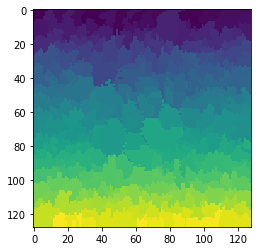

In [11]:
f = plt.figure()
plt.imshow(result_dict['ID_NCGC00261860_angles_-1_0']['num_features_2']['explanation'].segments)
f.savefig("../resultant_images/segment.pdf")

/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Fig

/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Fig

/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Fig

/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Fig

/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Fig

/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Fig

/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Fig

/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Fig

/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Fig

/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Fig

/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Fig

/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Fig

/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Fig

/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Fig

/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Fig

/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Fig

/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Fig

/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/envforlime/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Fig

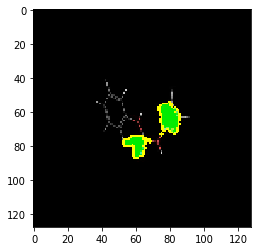

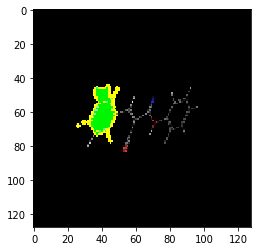

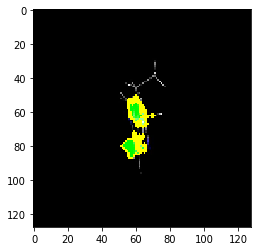

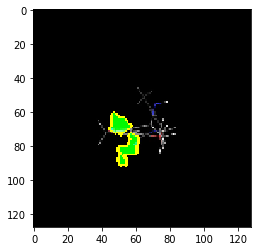

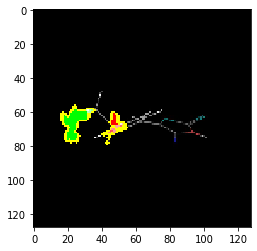

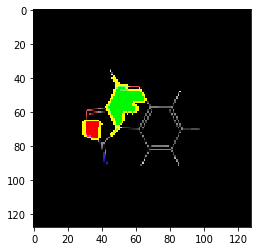

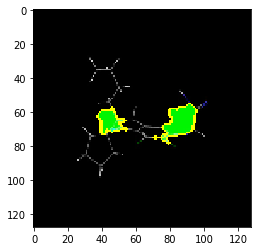

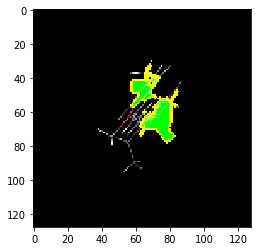

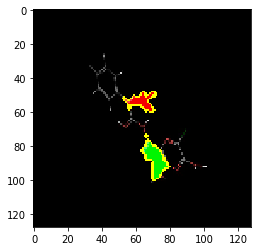

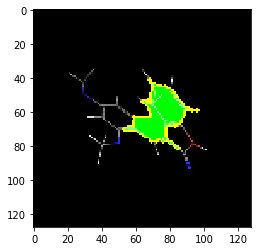

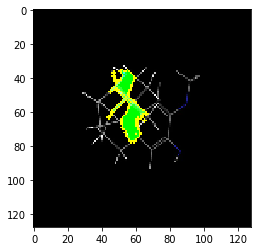

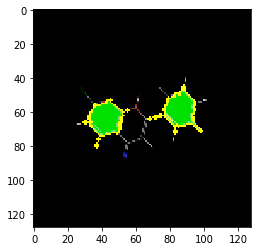

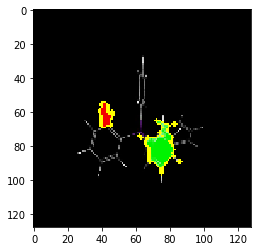

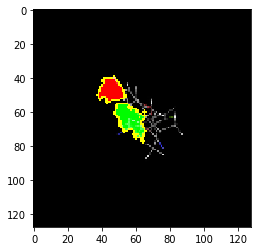

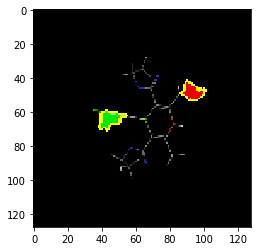

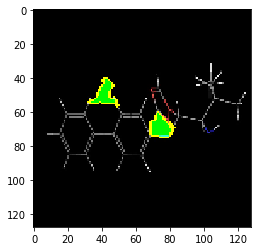

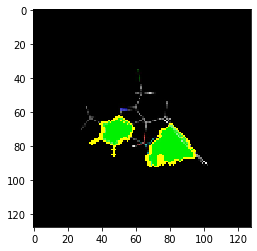

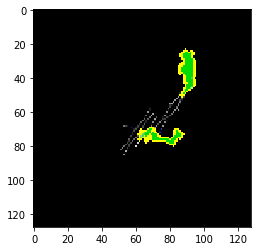

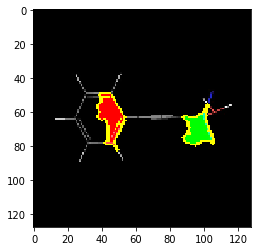

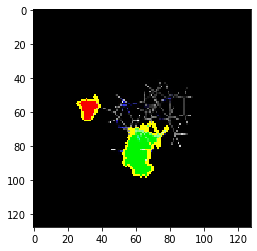

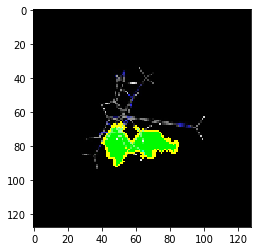

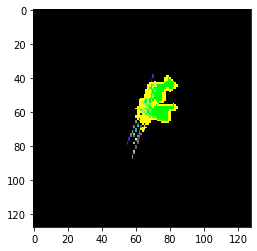

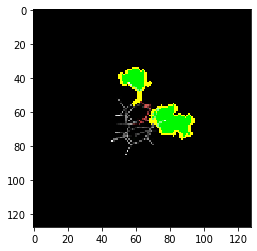

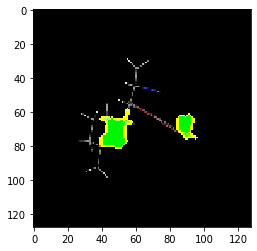

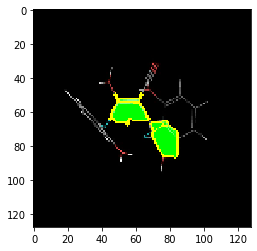

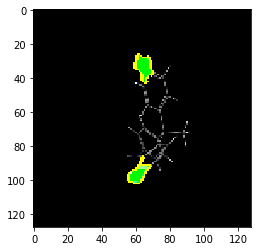

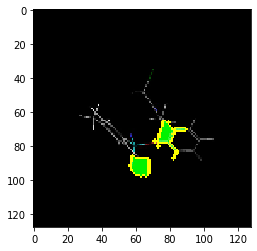

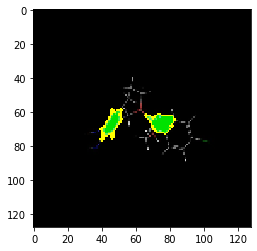

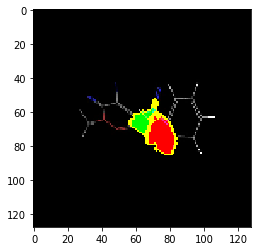

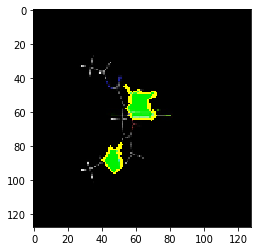

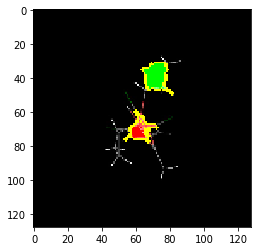

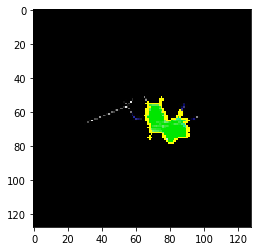

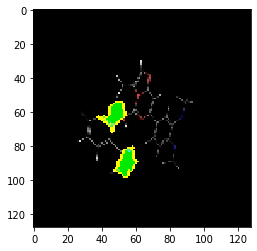

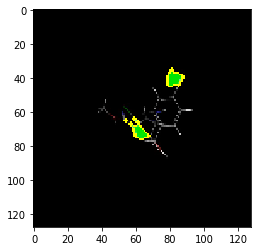

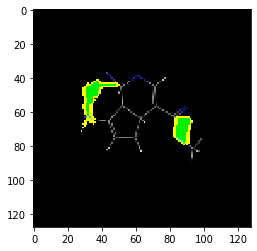

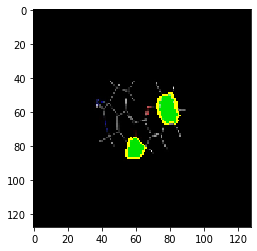

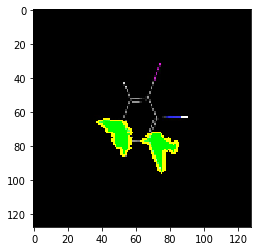

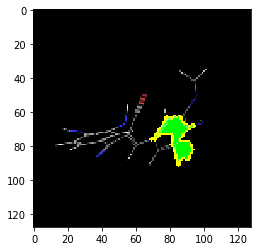

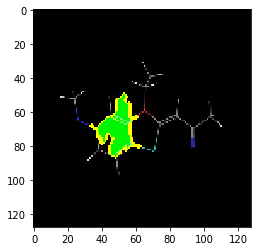

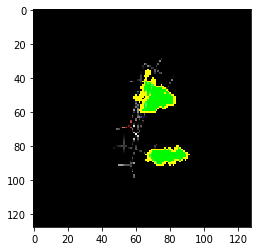

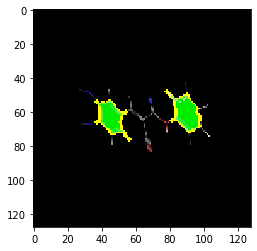

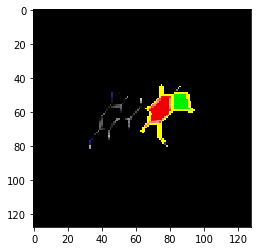

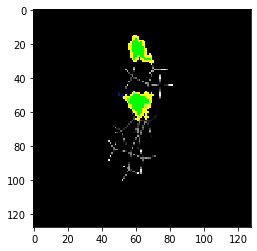

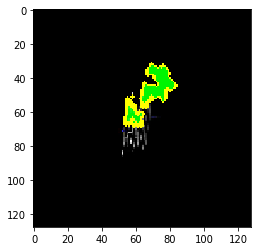

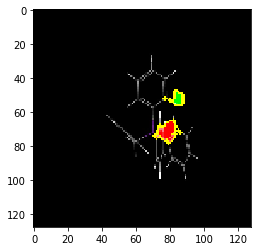

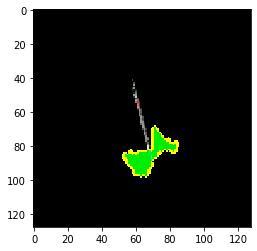

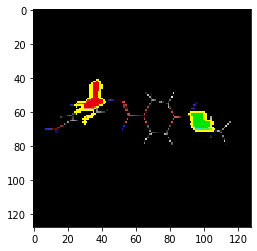

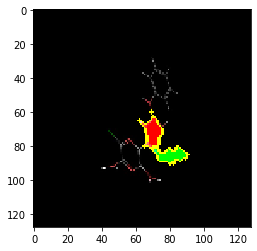

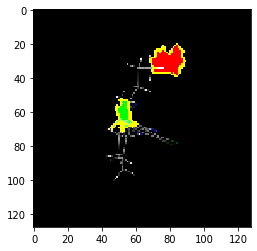

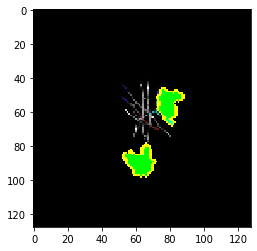

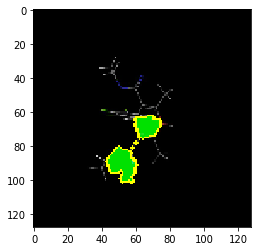

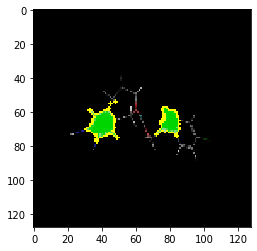

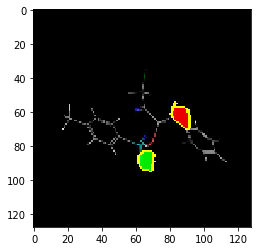

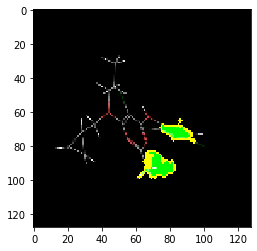

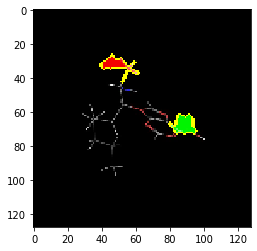

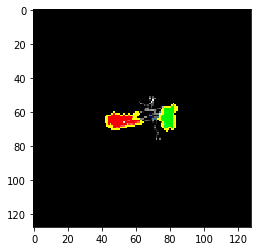

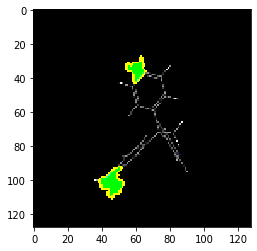

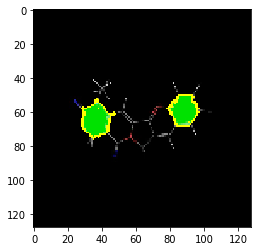

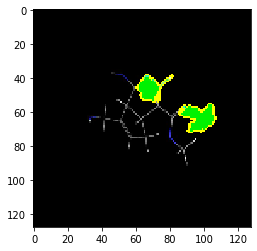

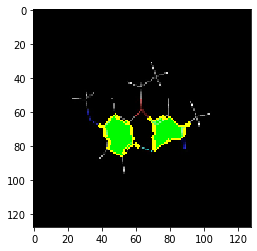

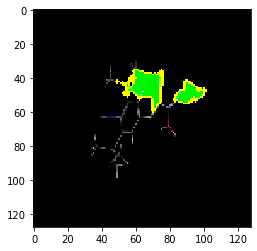

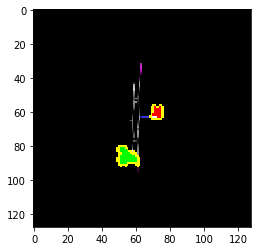

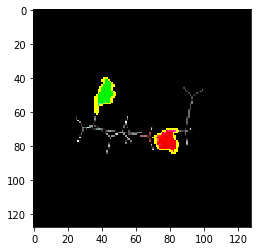

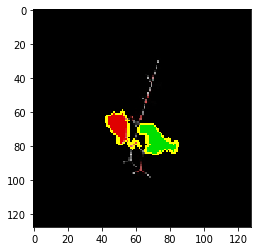

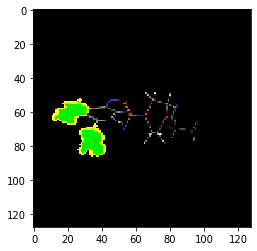

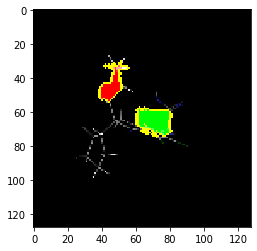

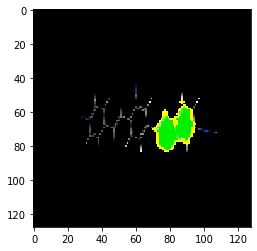

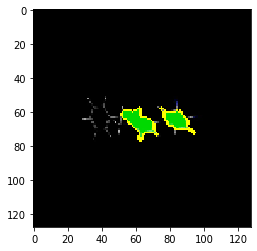

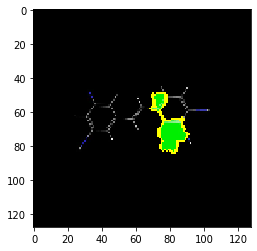

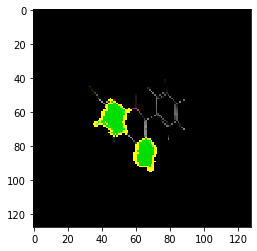

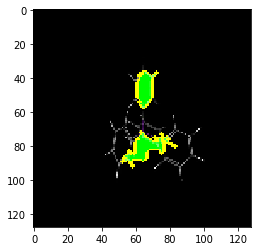

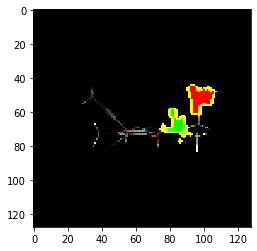

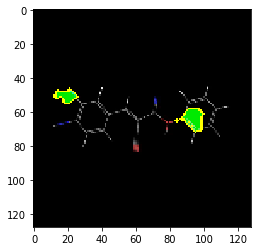

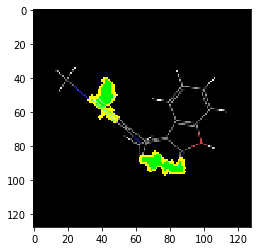

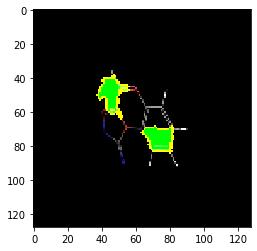

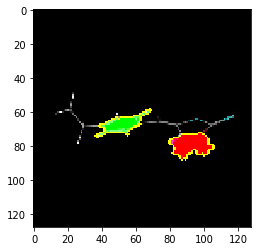

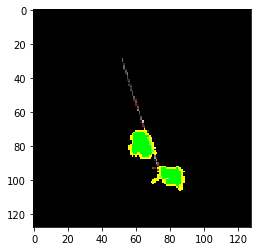

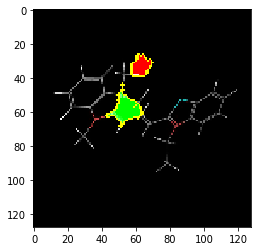

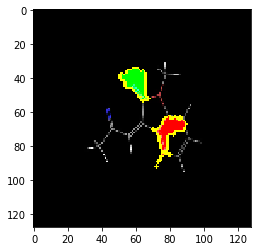

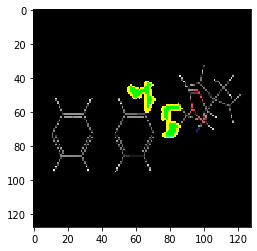

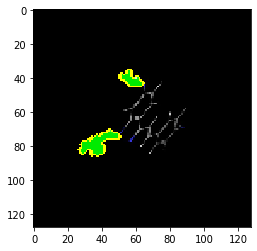

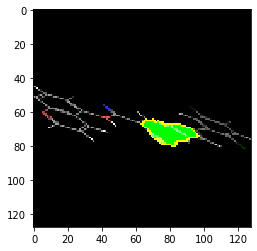

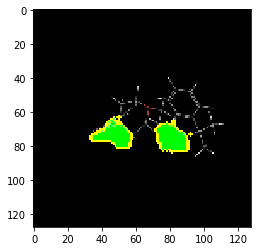

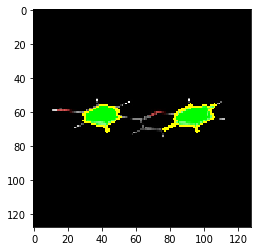

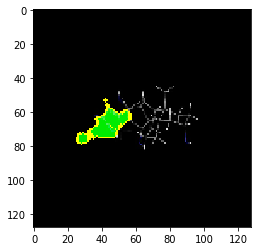

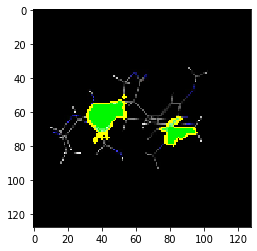

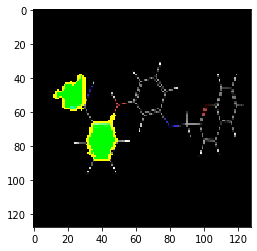

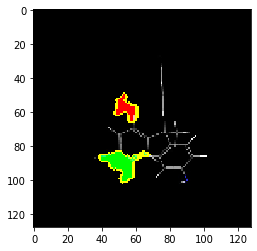

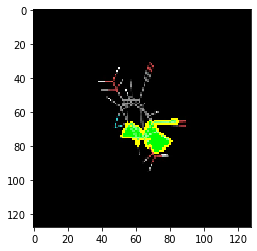

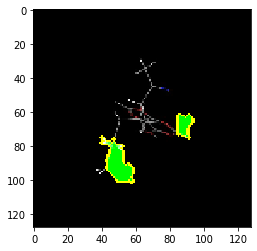

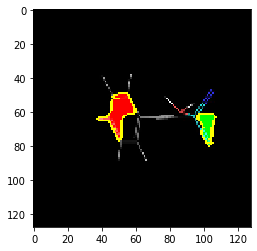

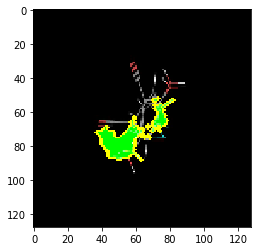

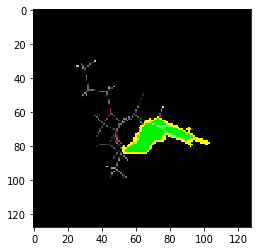

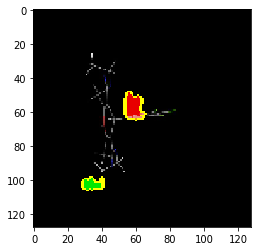

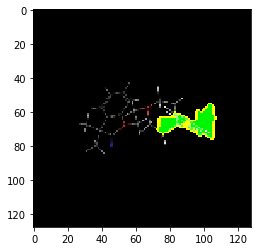

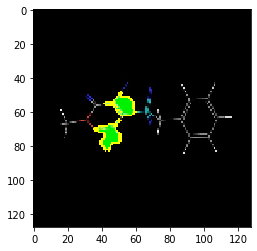

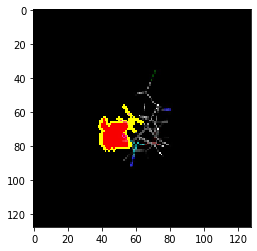

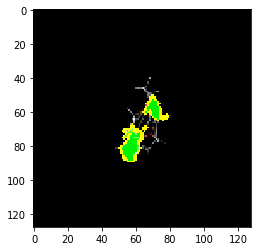

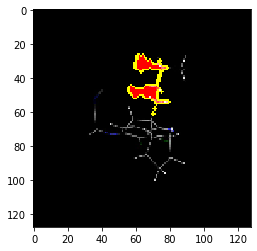

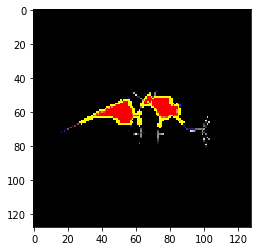

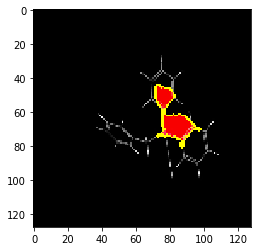

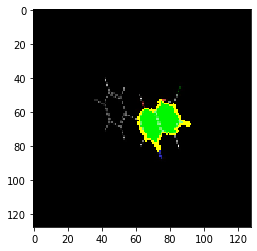

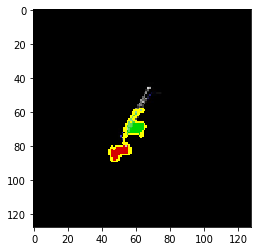

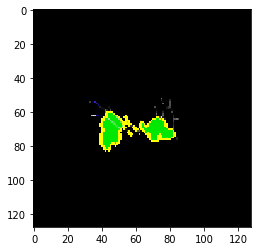

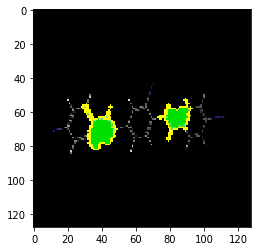

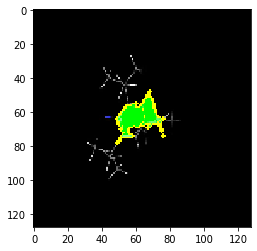

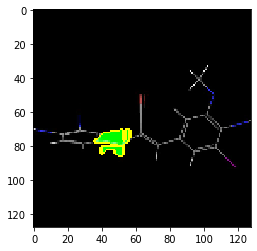

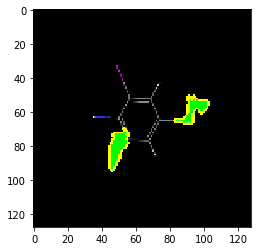

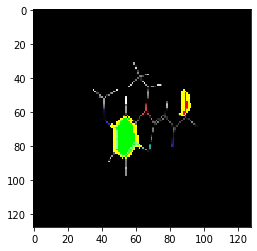

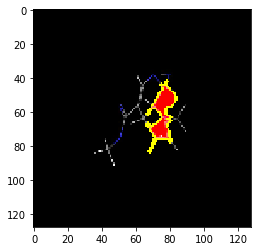

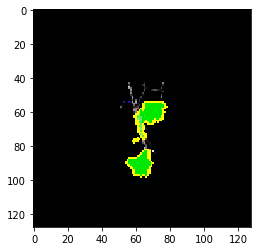

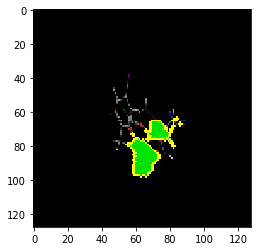

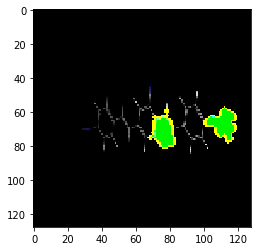

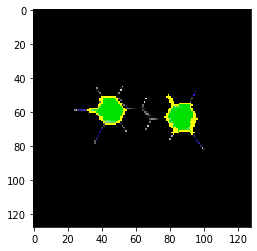

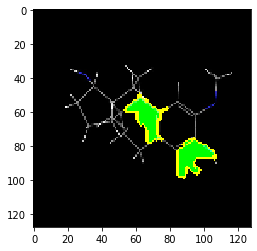

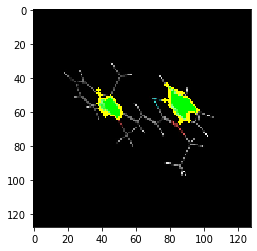

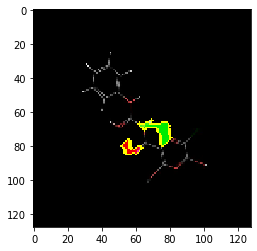

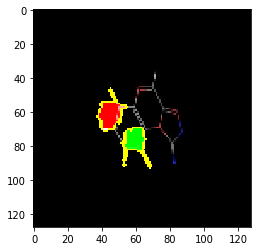

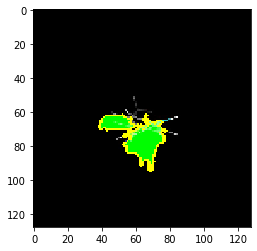

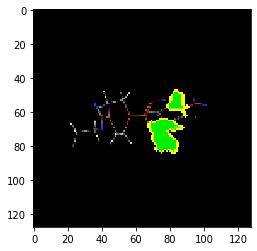

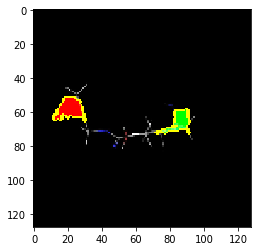

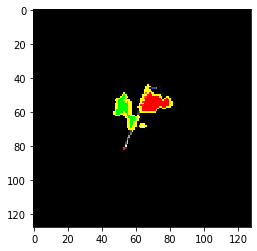

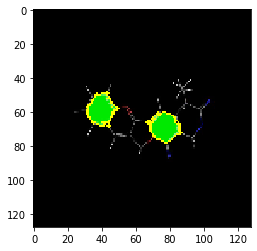

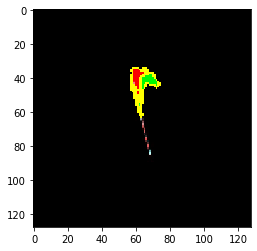

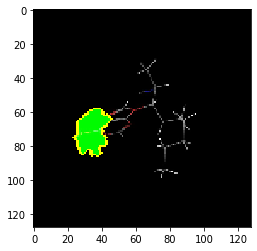

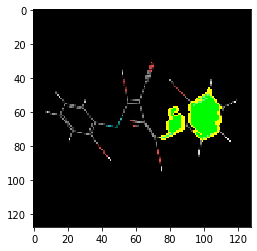

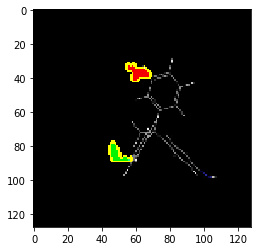

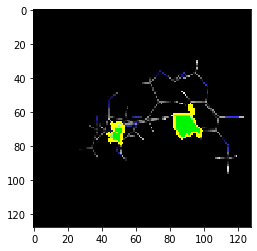

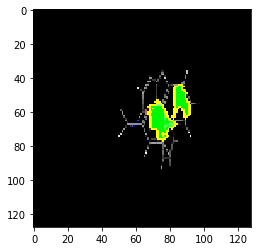

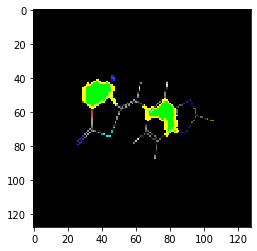

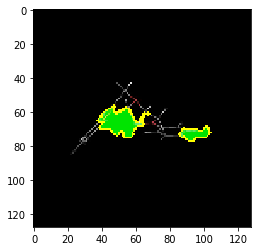

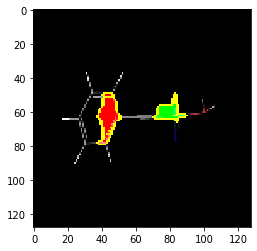

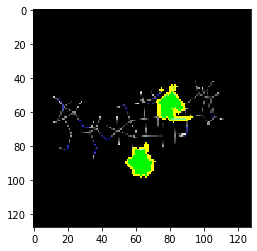

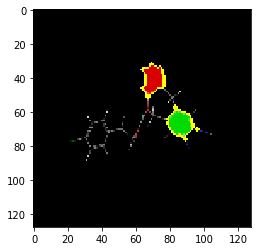

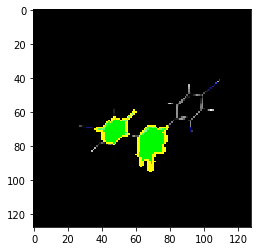

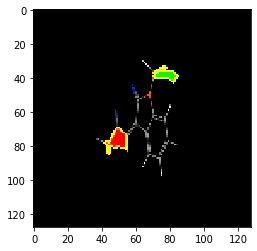

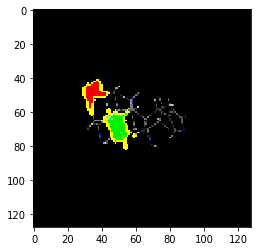

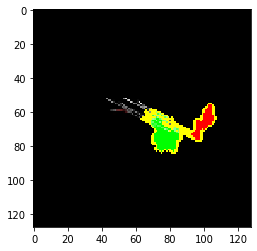

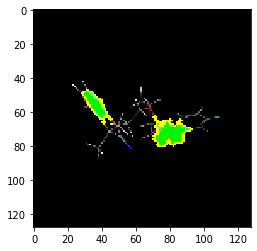

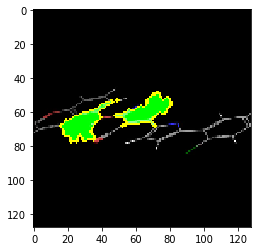

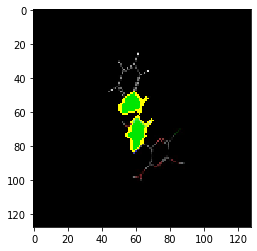

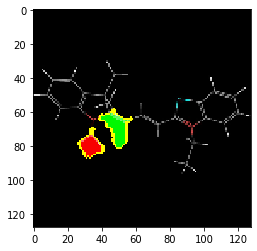

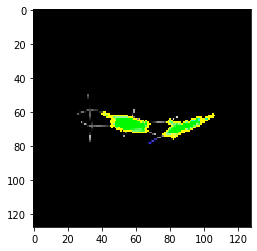

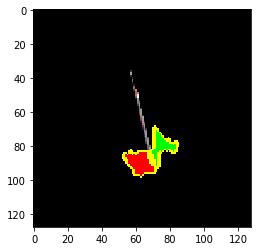

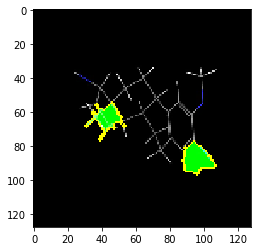

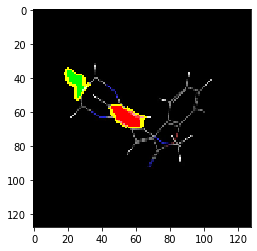

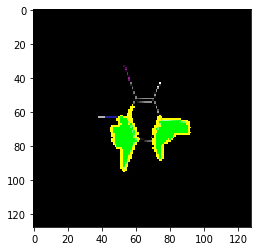

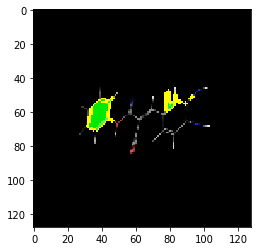

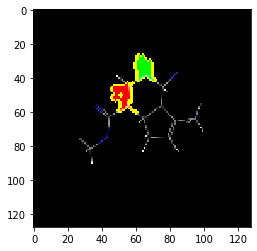

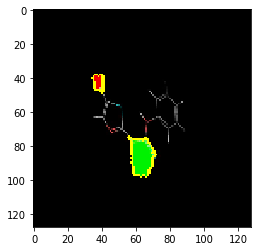

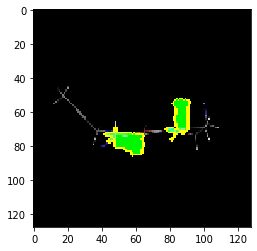

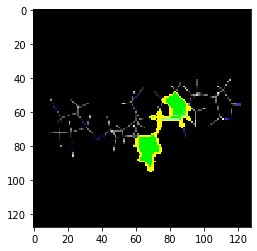

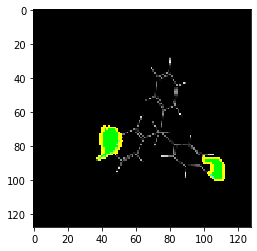

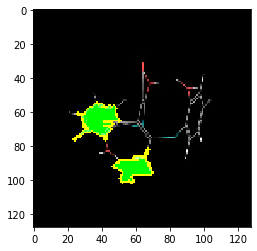

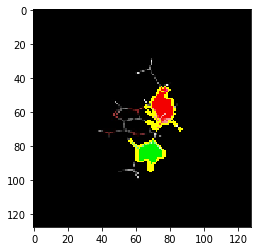

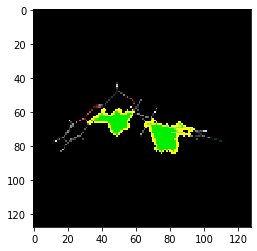

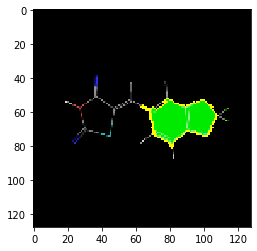

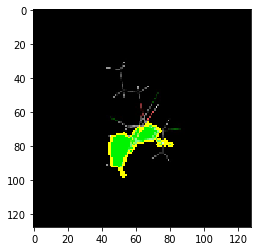

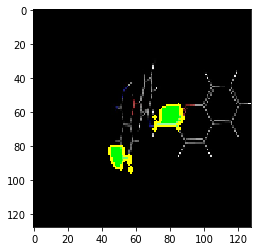

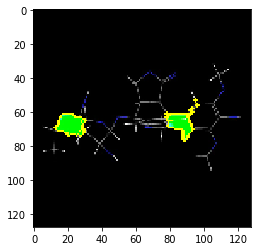

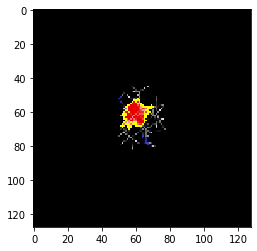

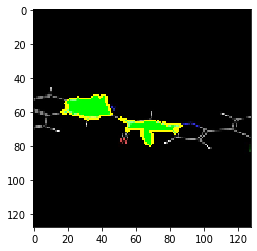

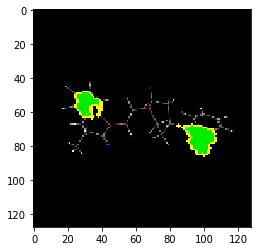

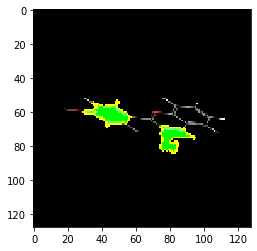

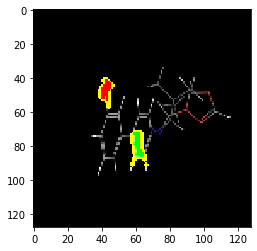

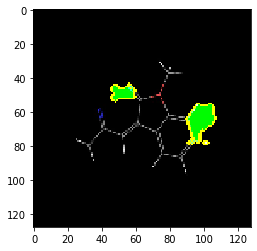

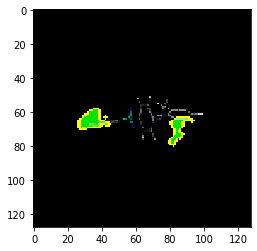

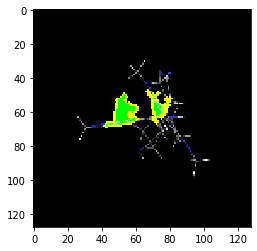

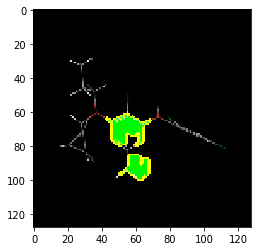

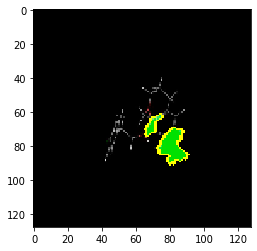

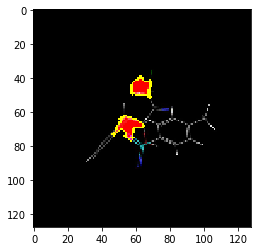

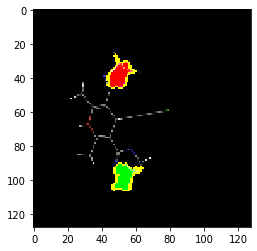

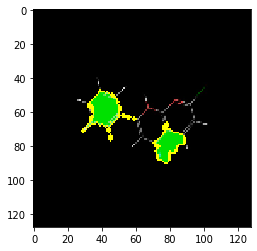

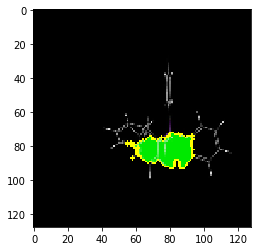

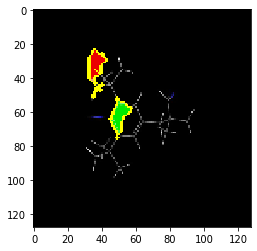

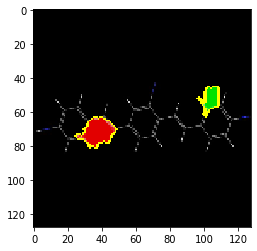

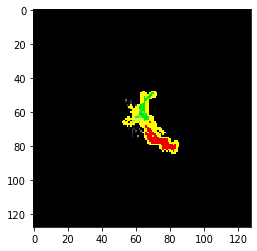

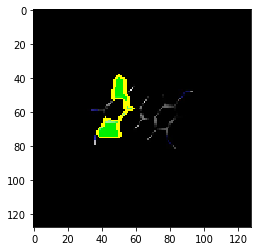

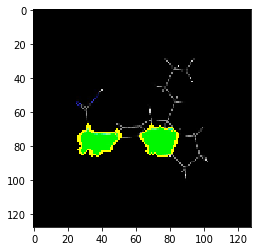

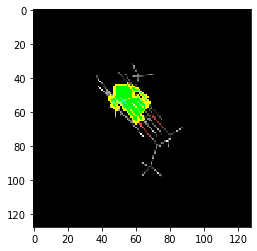

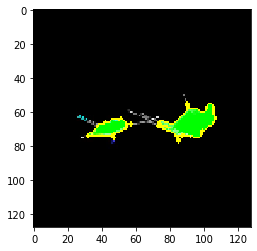

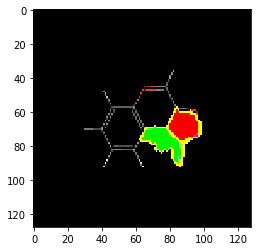

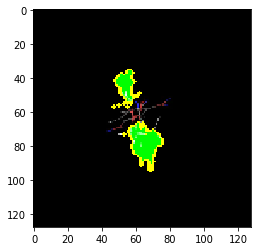

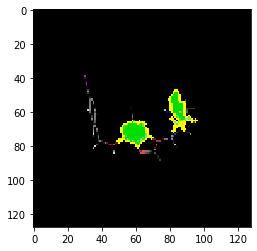

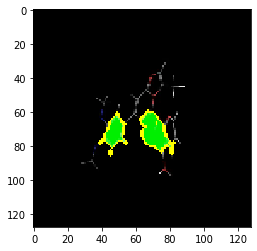

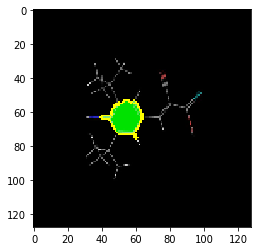

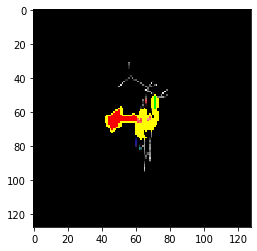

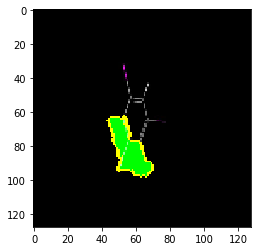

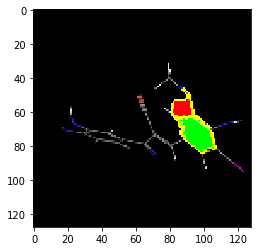

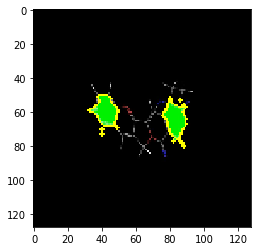

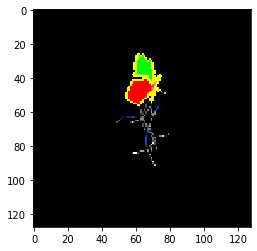

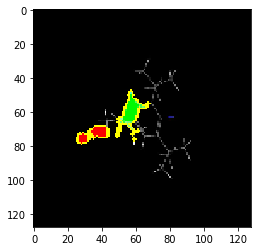

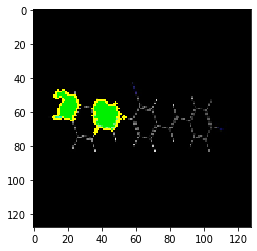

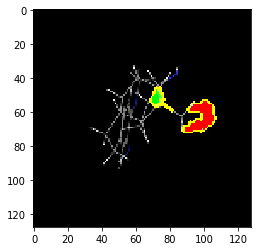

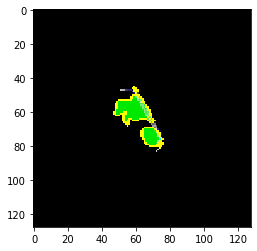

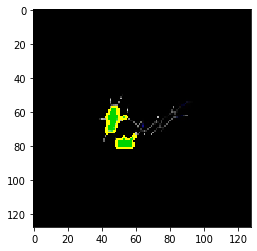

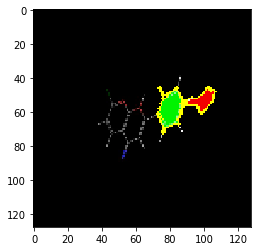

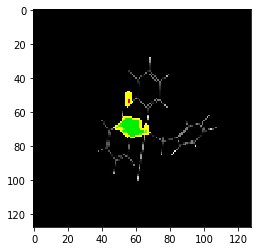

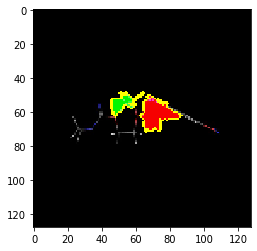

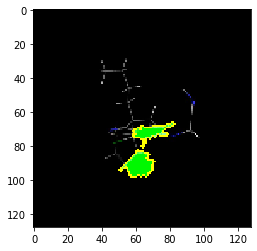

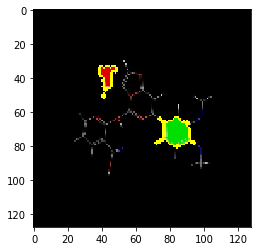

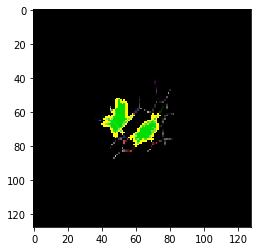

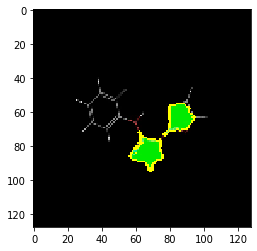

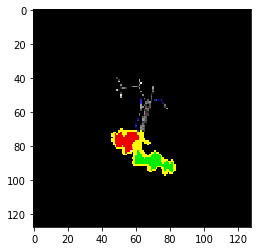

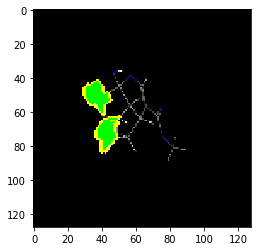

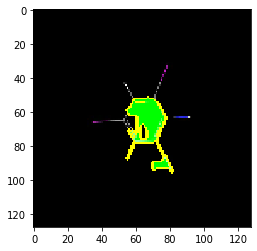

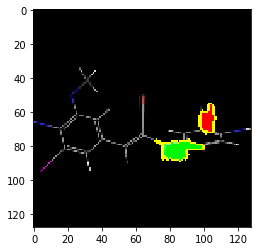

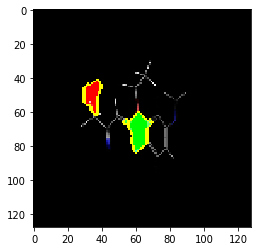

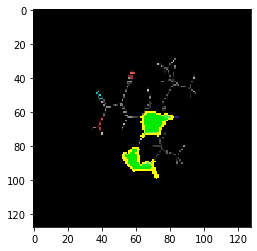

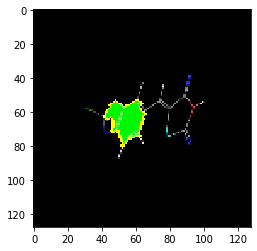

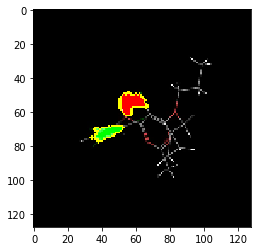

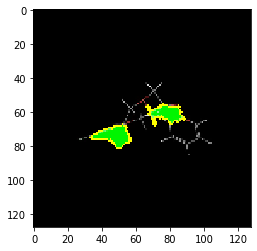

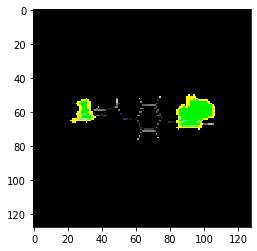

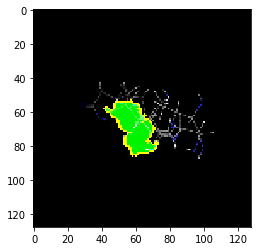

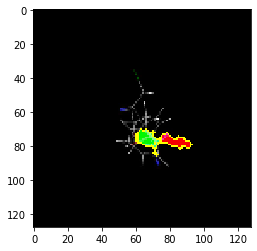

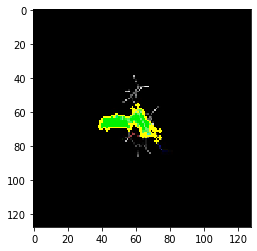

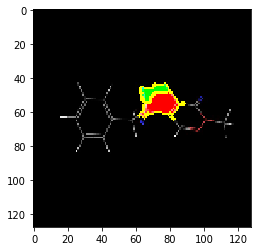

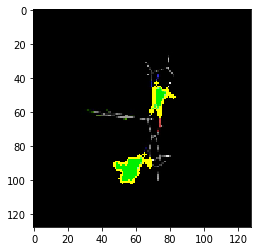

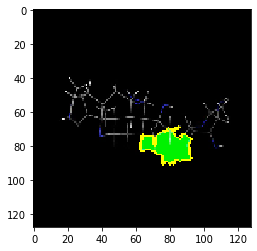

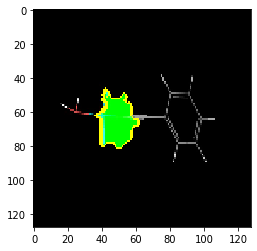

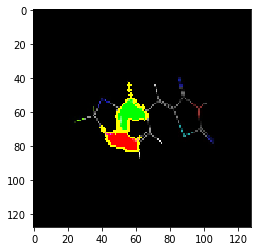

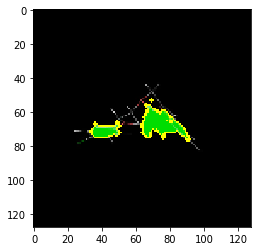

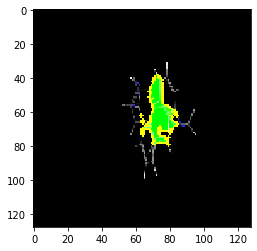

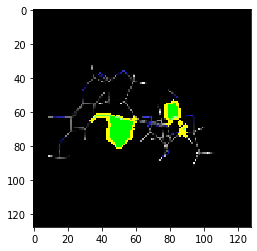

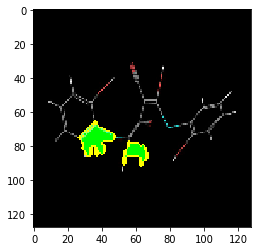

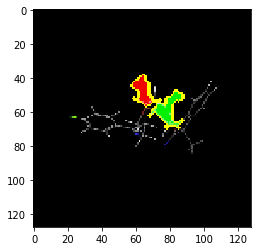

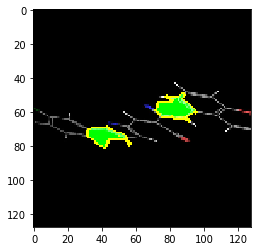

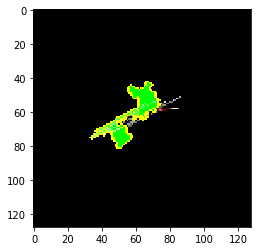

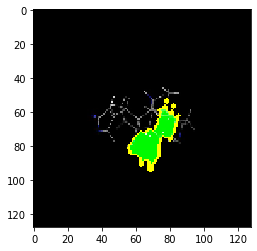

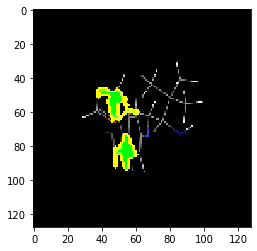

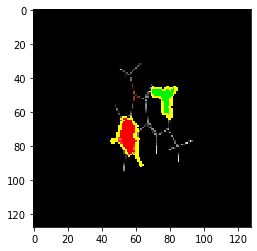

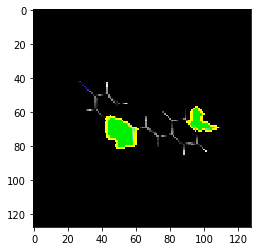

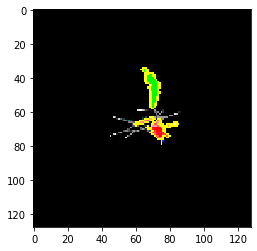

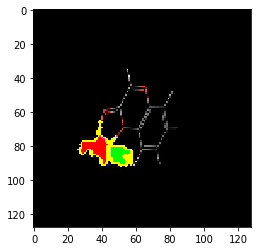

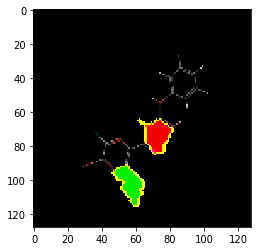

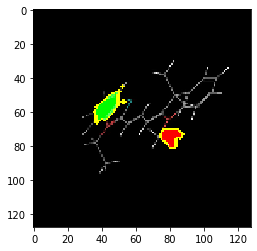

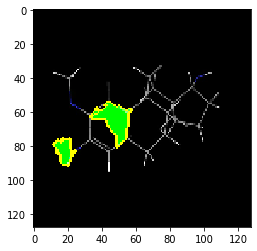

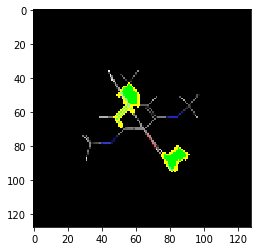

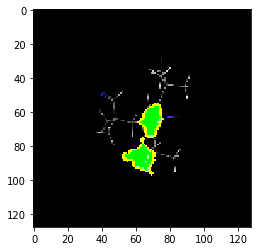

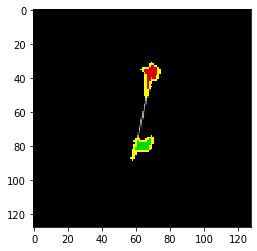

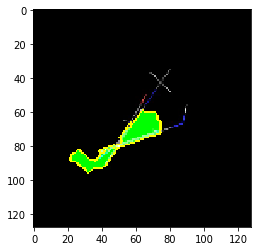

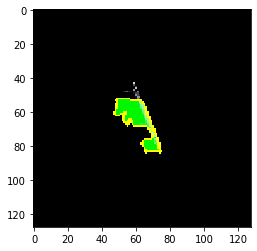

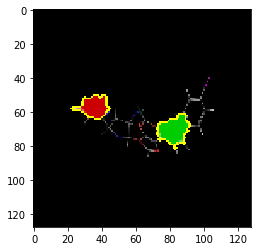

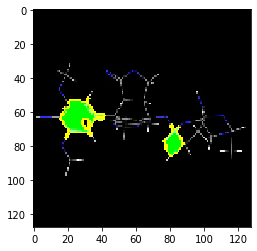

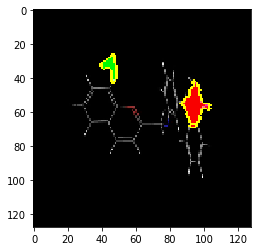

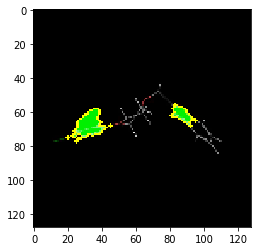

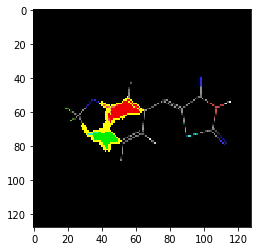

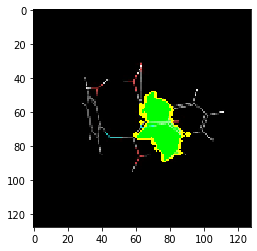

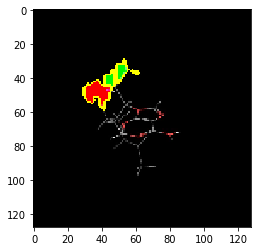

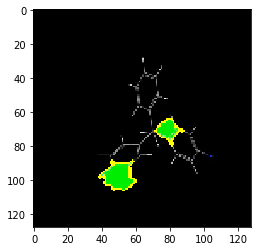

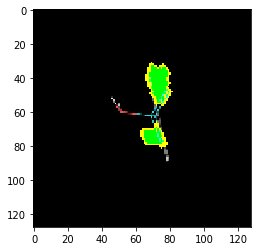

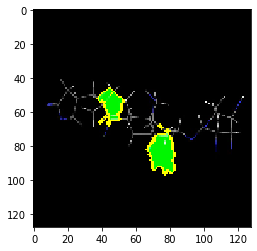

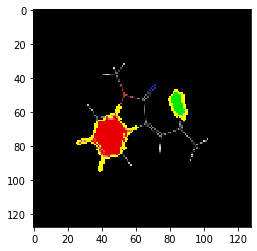

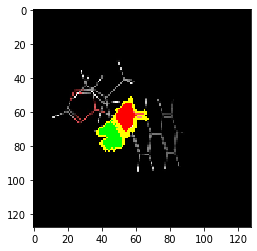

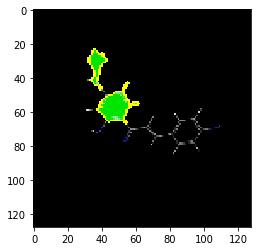

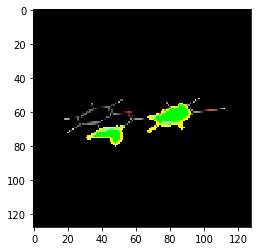

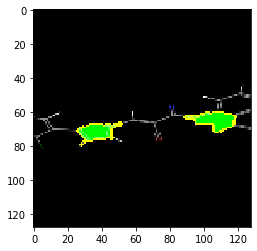

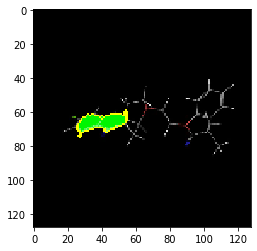

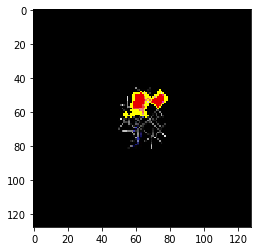

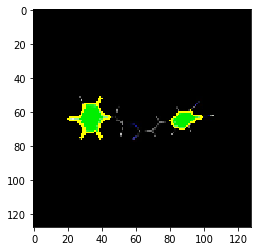

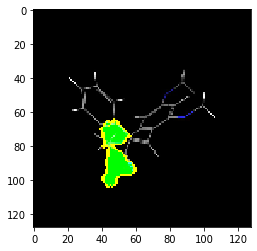

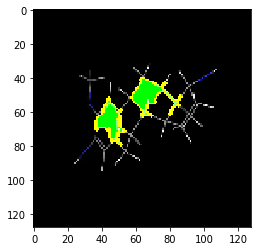

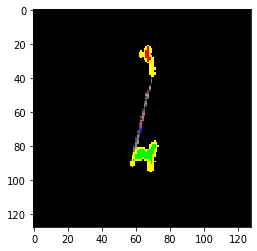

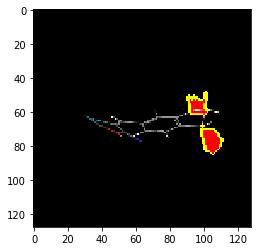

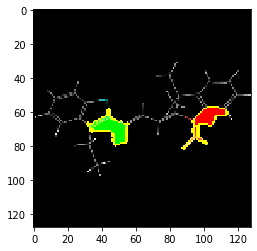

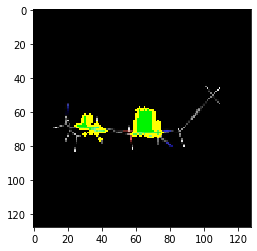

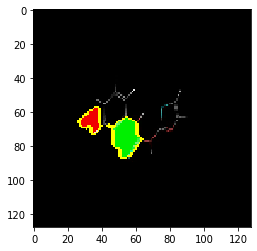

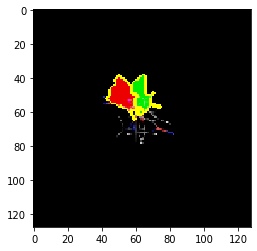

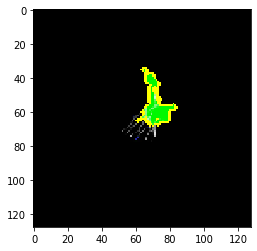

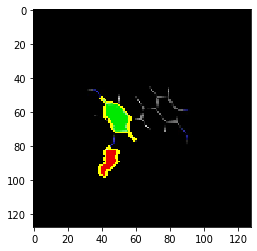

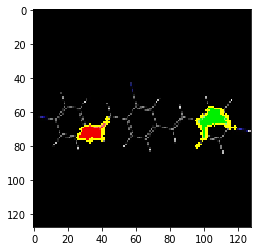

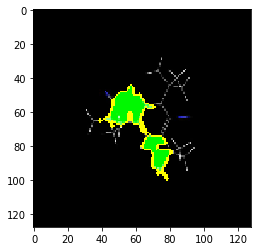

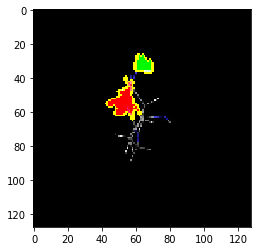

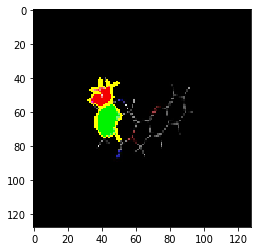

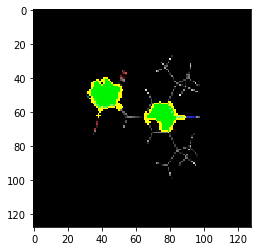

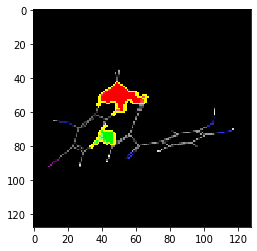

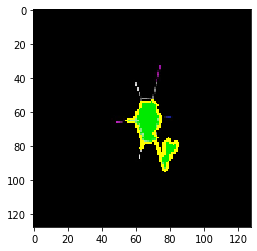

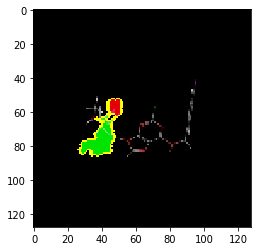

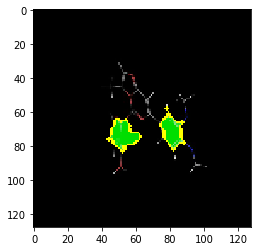

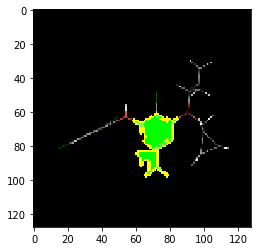

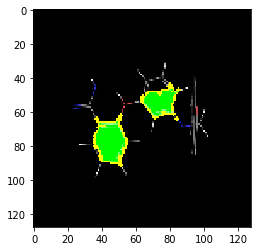

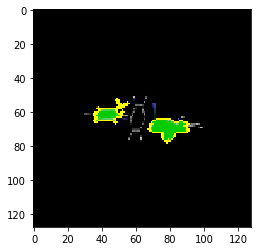

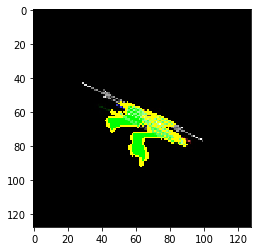

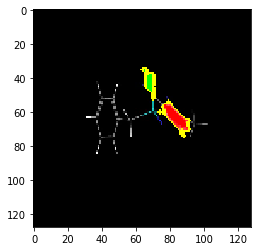

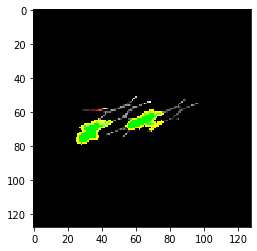

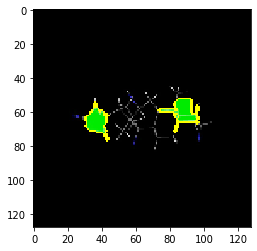

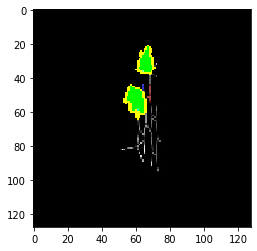

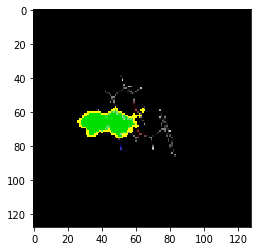

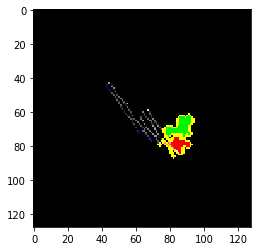

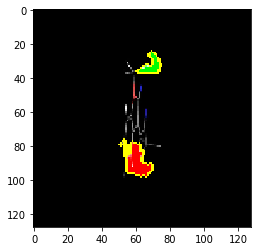

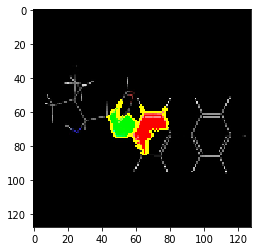

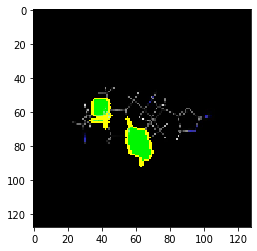

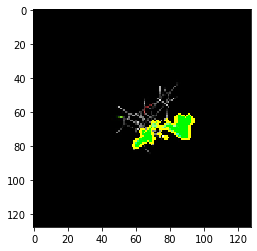

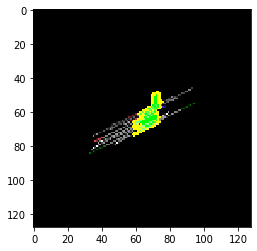

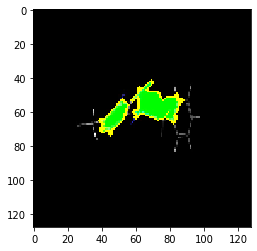

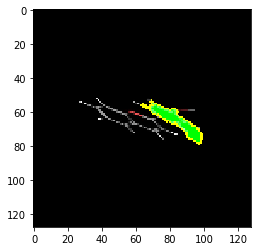

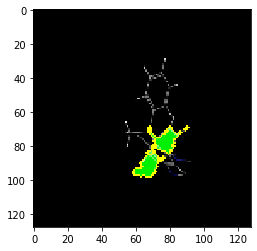

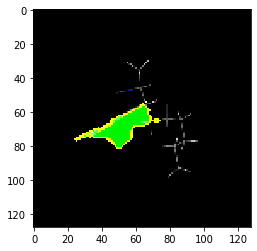

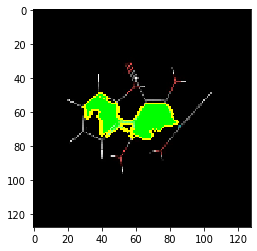

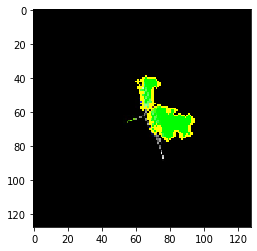

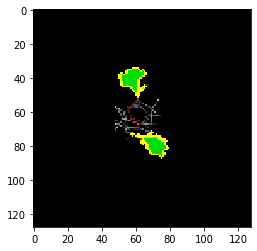

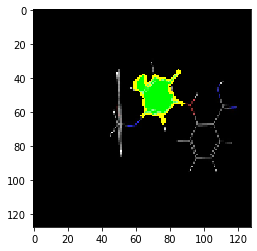

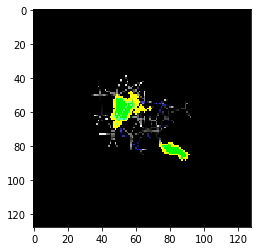

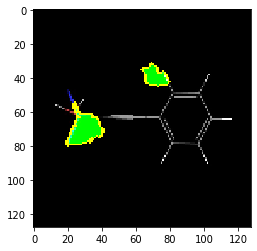

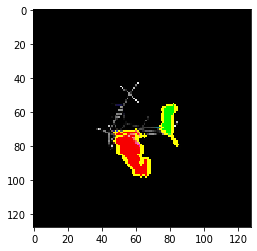

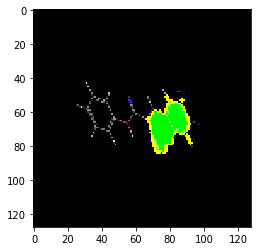

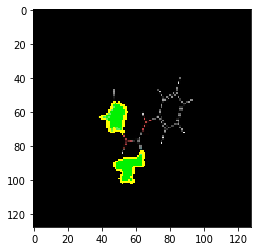

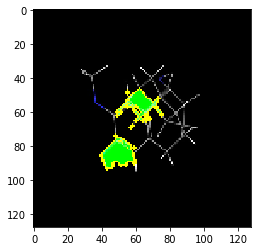

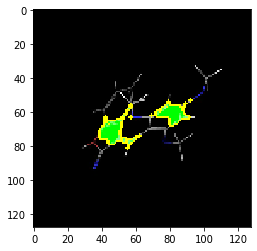

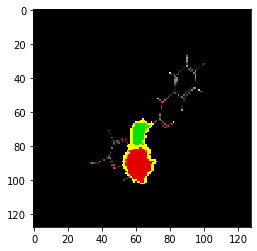

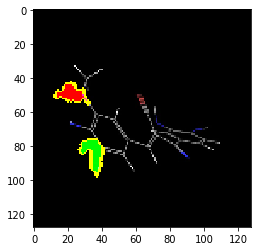

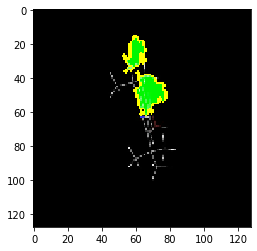

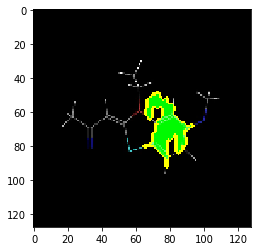

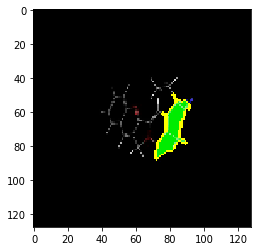

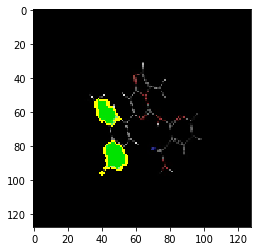

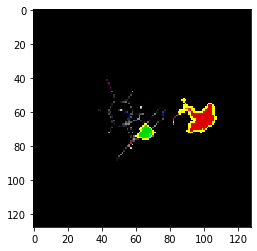

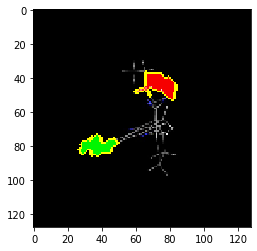

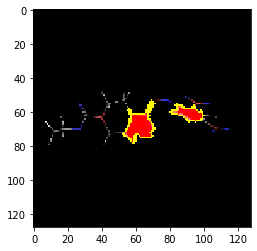

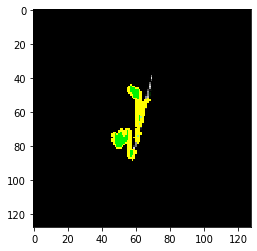

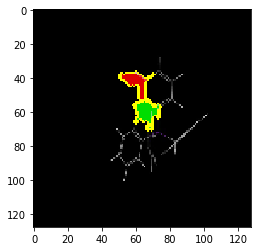

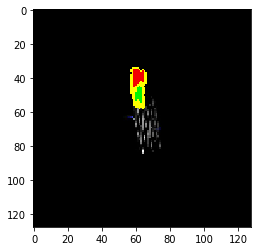

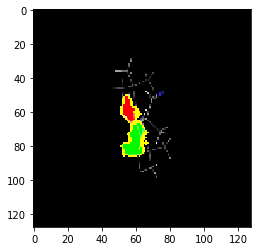

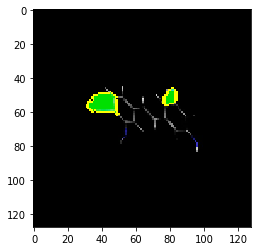

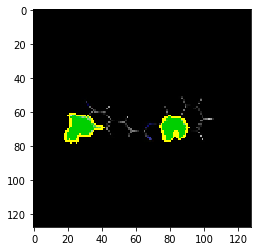

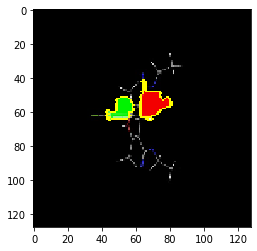

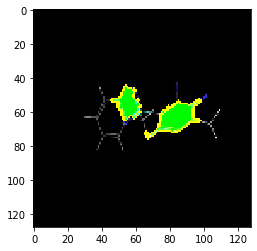

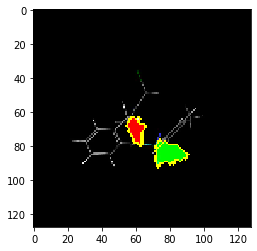

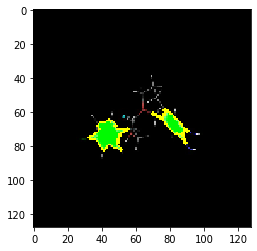

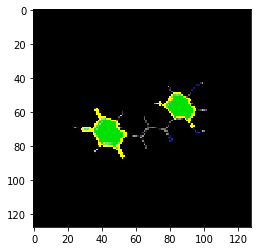

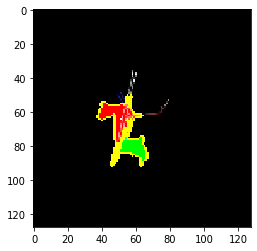

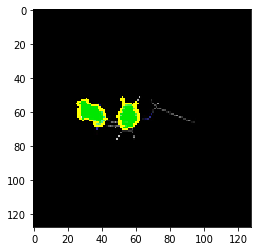

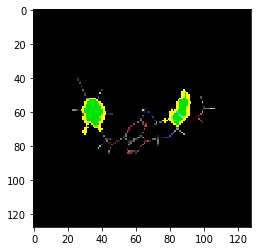

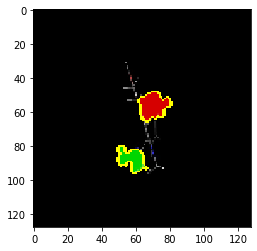

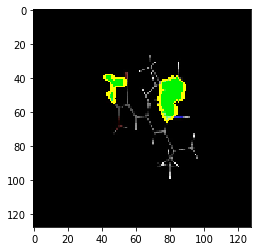

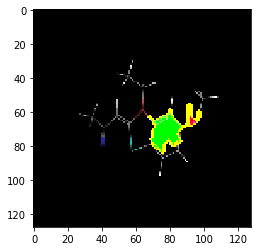

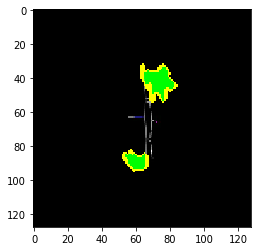

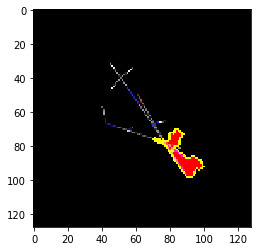

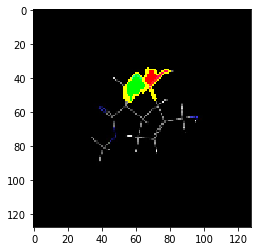

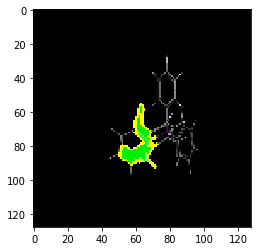

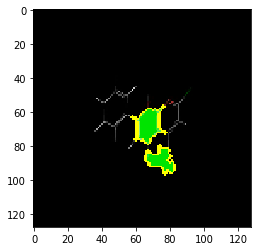

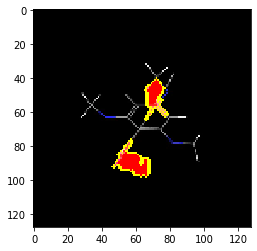

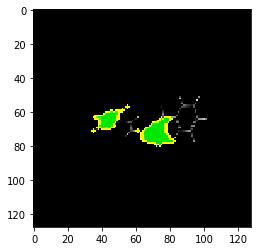

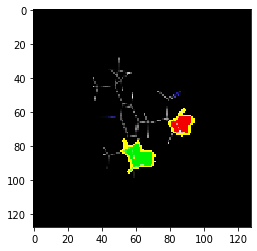

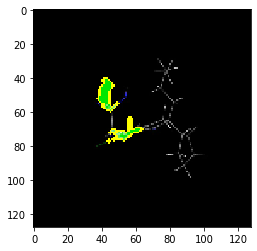

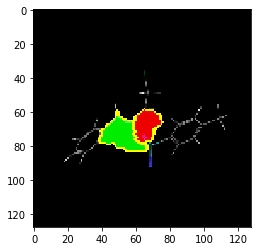

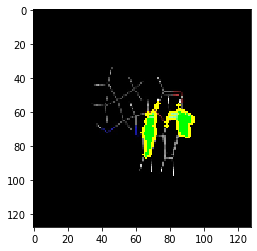

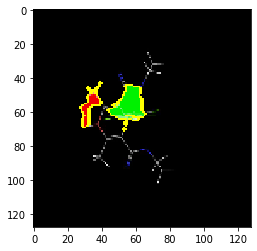

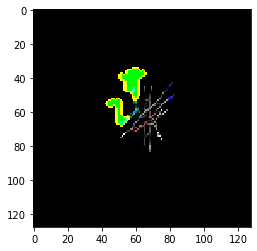

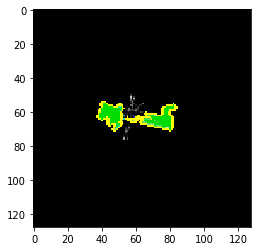

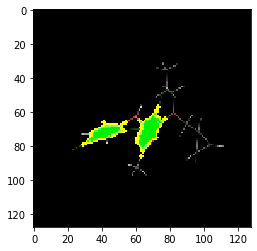

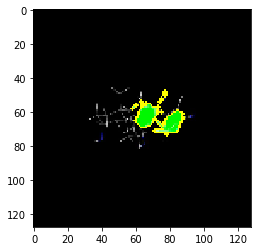

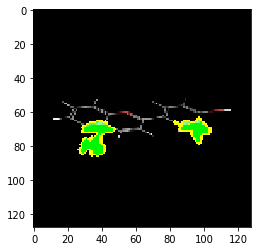

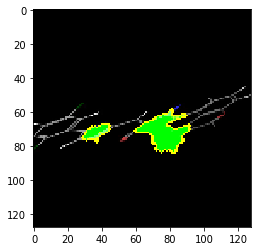

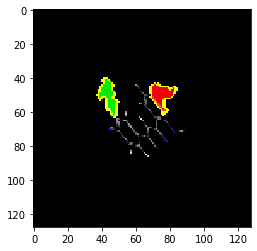

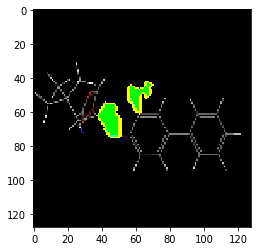

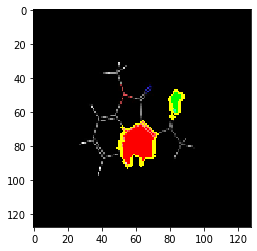

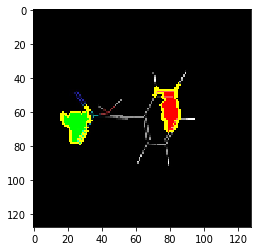

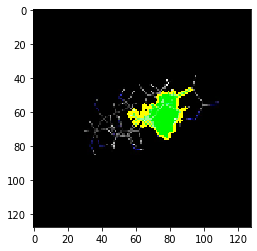

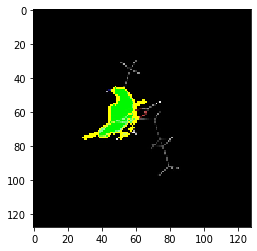

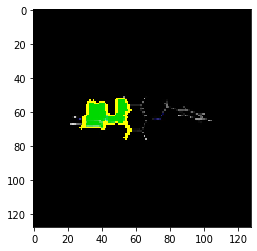

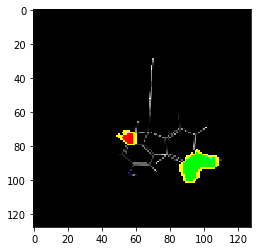

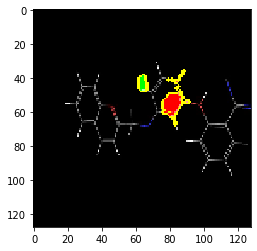

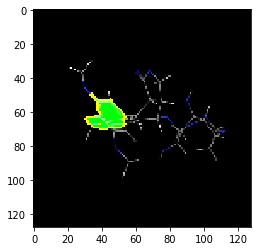

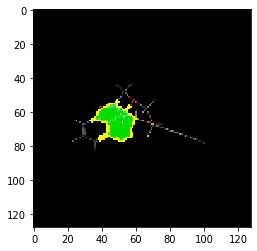

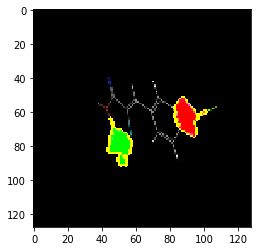

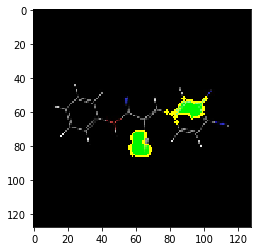

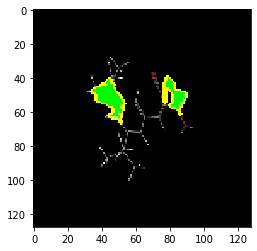

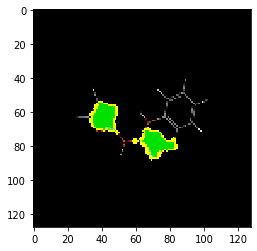

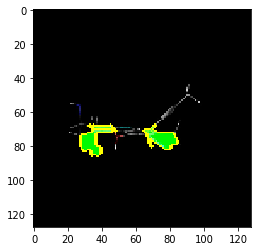

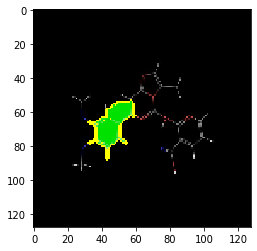

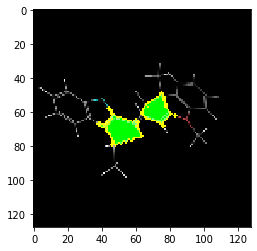

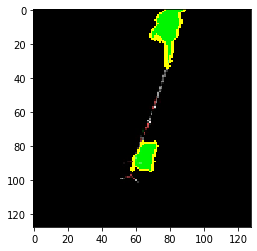

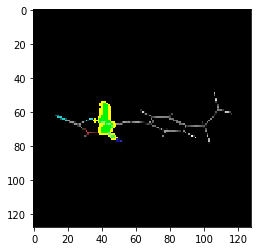

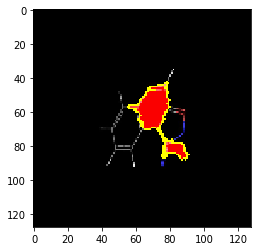

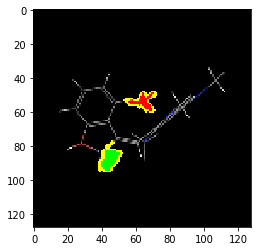

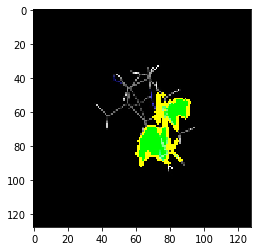

In [31]:
#for rotation in ["-1_0","0_45","1_45","2_45","3_45","4_45","5_45","6_45"]:
for key in result_dict.keys():
    f = plt.figure()
    plt.imshow(result_dict[key]['num_features_2']['mb'])
    f.savefig("../resultant_images/"+key+".pdf")

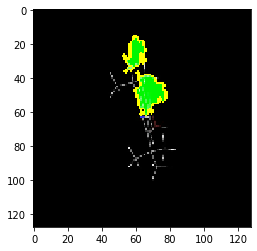

In [14]:
f = plt.figure()
plt.imshow(result_dict['ID_NCGC00261860_angles_0_45']['num_features_2']['mb'])
f.savefig("../resultant_images/ID_NCGC00261860_angles_0_45_masked.pdf")

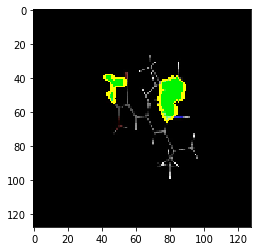

In [15]:
f = plt.figure()
plt.imshow(result_dict['ID_NCGC00261860_angles_1_45']['num_features_2']['mb'])
f.savefig("../resultant_images/ID_NCGC00261860_angles_1_45_masked.pdf")

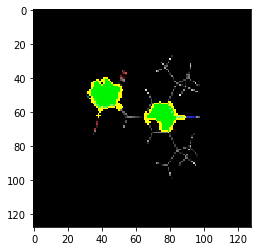

In [16]:
f = plt.figure()
plt.imshow(result_dict['ID_NCGC00261860_angles_2_45']['num_features_2']['mb'])
f.savefig("../resultant_images/ID_NCGC00261860_angles_2_45_masked.pdf")

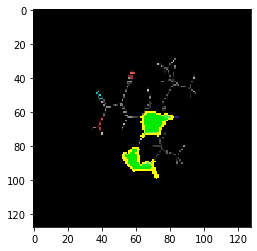

In [17]:
f = plt.figure()
plt.imshow(result_dict['ID_NCGC00261860_angles_3_45']['num_features_2']['mb'])
f.savefig("../resultant_images/ID_NCGC00261860_angles_3_45_masked.pdf")

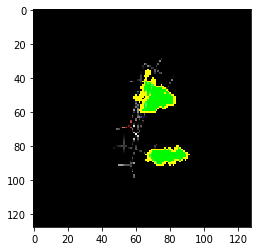

In [19]:
f = plt.figure()
plt.imshow(result_dict['ID_NCGC00261860_angles_4_45']['num_features_2']['mb'])
f.savefig("../resultant_images/ID_NCGC00261860_angles_4_45_masked.pdf")

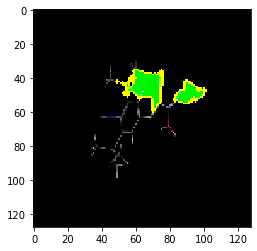

In [20]:
f = plt.figure()
plt.imshow(result_dict['ID_NCGC00261860_angles_5_45']['num_features_2']['mb'])
f.savefig("../resultant_images/ID_NCGC00261860_angles_5_45_masked.pdf")

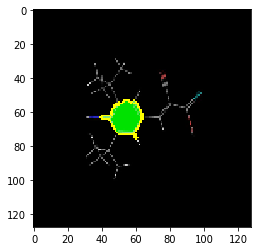

In [21]:
f = plt.figure()
plt.imshow(result_dict['ID_NCGC00261860_angles_6_45']['num_features_2']['mb'])
f.savefig("../resultant_images/ID_NCGC00261860_angles_6_45_masked.pdf")

In [1]:
from optparse import OptionParser
oparser = OptionParser()

In [8]:
path = '../images/Tox21_p53_Test/toxic'


In [9]:
testing =True
if testing ==True:
    f = f[:10]


In [46]:
result_dict = pickle.load(open('../pickles/results_summary_tox21_p53_PC_test1553611772_128355_pkl','rb'))

In [47]:
plt.imshow(result_dict['ID_NCGC00261860_angles_5_45']['num_features_1']['mb'])

KeyError: 'ID_NCGC00261860_angles_5_45'

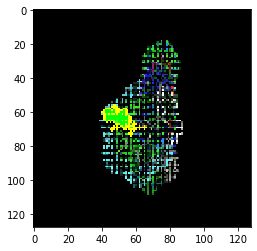

In [41]:
plt.imshow(result_dict['ID_NCGC00261499_angles_1_45']['num_features_1']['mb'])

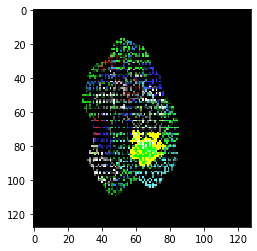

In [42]:
plt.imshow(result_dict['ID_NCGC00261499_angles_2_45']['num_features_1']['mb'])

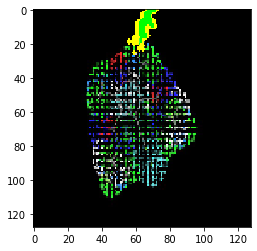

In [43]:
plt.imshow(result_dict['ID_NCGC00261499_angles_3_45']['num_features_1']['mb'])

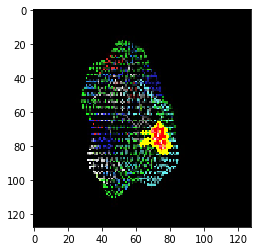

In [44]:
plt.imshow(result_dict['ID_NCGC00261499_angles_4_45']['num_features_1']['mb'])